In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import pickle
import os
import matplotlib.pyplot as plt
import glob
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL_DATA_DIR = "/content/drive/MyDrive/Applied ML Group 18/model_data/"

X_TRAIN2_FILE = MODEL_DATA_DIR + 'x_train_2.csv'
Y_TRAIN2_FILE = MODEL_DATA_DIR + 'y_train_2.csv'
X_TEST2_FILE = MODEL_DATA_DIR + 'x_test_2.csv'
Y_TEST2_FILE = MODEL_DATA_DIR + 'y_test_2.csv'
LABEL_MAP_FILE = MODEL_DATA_DIR +  'label_map.csv'

X_train2 = pd.read_csv(X_TRAIN2_FILE, index_col=0)
y_train2 = pd.read_csv(Y_TRAIN2_FILE, index_col=0)
X_test2 = pd.read_csv(X_TEST2_FILE, index_col=0)
y_test2 = pd.read_csv(Y_TEST2_FILE, index_col=0)
LABEL_MAP = pd.read_csv(LABEL_MAP_FILE)

X_train2

,Age,Hours per day,Anxiety,Depression,Insomnia,OCD,Frequency [Classical] ordinal,Frequency [Country] ordinal,Frequency [EDM] ordinal,Frequency [Folk] ordinal,...,Exploratory ordinal,Music effects ordinal,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,Foreign languages_No,Foreign languages_Yes
0,22,2,7,7,8,3,1,0,1,1,...,1,1,0,0,0,0,0,1,1,0
1,18,2,5,7,2,0,2,1,2,0,...,0,1,0,0,0,0,1,0,1,0
2,31,2,8,9,6,2,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,17,3,8,10,9,2,1,1,0,2,...,0,1,1,0,0,0,0,0,1,0
4,18,3,8,9,0,0,1,0,0,2,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,17,8,4,4,4,2,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2380,17,10,1,3,7,4,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2381,17,9,3,4,5,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2382,17,10,2,3,6,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train2_arr = np.asarray(X_train2)
y_train2_arr = np.asarray(y_train2['Fav genre'])
X_test2_arr = np.asarray(X_test2)
y_test2_arr = np.asarray(y_test2['Fav genre'])

X_train2_arr

array([[22,  2,  7, ...,  1,  1,  0],
       [18,  2,  5, ...,  0,  1,  0],
       [31,  2,  8, ...,  0,  1,  0],
       ...,
       [17,  9,  3, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0],
       [17, 10,  2, ...,  0,  0,  0]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

parameters = { "max_depth": range(1, 11),
              "min_samples_split": range(2, 21)}

# Hyperparameter tuning
tuning_tree = DecisionTreeClassifier()
tuning = GridSearchCV(tuning_tree, param_grid = parameters, cv = 5)
tuning.fit(X_train2_arr, y_train2_arr)

best_estimators = tuning.best_params_

best_depth, best_min_samples_split = best_estimators["max_depth"], best_estimators["min_samples_split"]

best_tree = DecisionTreeClassifier(max_depth = best_depth, min_samples_split = best_min_samples_split)

best_tree.fit(X_train2_arr, y_train2_arr)

print(f"Best Depth: {best_depth}")
print(f"Best sample split: {best_min_samples_split}")

Best Depth: 10
Best sample split: 13


In [ ]:
# Testing whether gini or entropy is better
best_tree_ent = DecisionTreeClassifier(max_depth = best_depth, criterion = "entropy")
best_tree_gini = DecisionTreeClassifier(max_depth = best_depth, criterion = "gini")

best_tree_ent.fit(X_train2_arr, y_train2_arr)
best_tree_gini.fit(X_train2_arr, y_train2_arr)

print(f'entropy score: {best_tree_ent.score(X_train2_arr, y_train2_arr)}')
print(f'gini score: {best_tree_gini.score(X_train2_arr, y_train2_arr)}')

entropy score: 0.8787751677852349
gini score: 0.7067953020134228


In [ ]:
# Scoring using entropy since it was higher
best_tree = DecisionTreeClassifier(max_depth = best_depth, criterion = "entropy")
best_tree.fit(X_train2_arr, y_train2_arr)
prediction_ent = best_tree.predict(X_test2_arr)

print(f'gini accuracy score: {accuracy_score(y_test2_arr, prediction_ent)}')
print(f'gini precision score: {precision_score(y_test2_arr, prediction_ent, average = "weighted")}')
print(f'gini recall score: {recall_score(y_test2_arr, prediction_ent, average = "weighted")}')
print(f'gini f1 score: {f1_score(y_test2_arr, prediction_ent, average = "weighted")}')

gini accuracy score: 0.3287671232876712
gini precision score: 0.3438547950296014
gini recall score: 0.3287671232876712
gini f1 score: 0.30780400006425485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


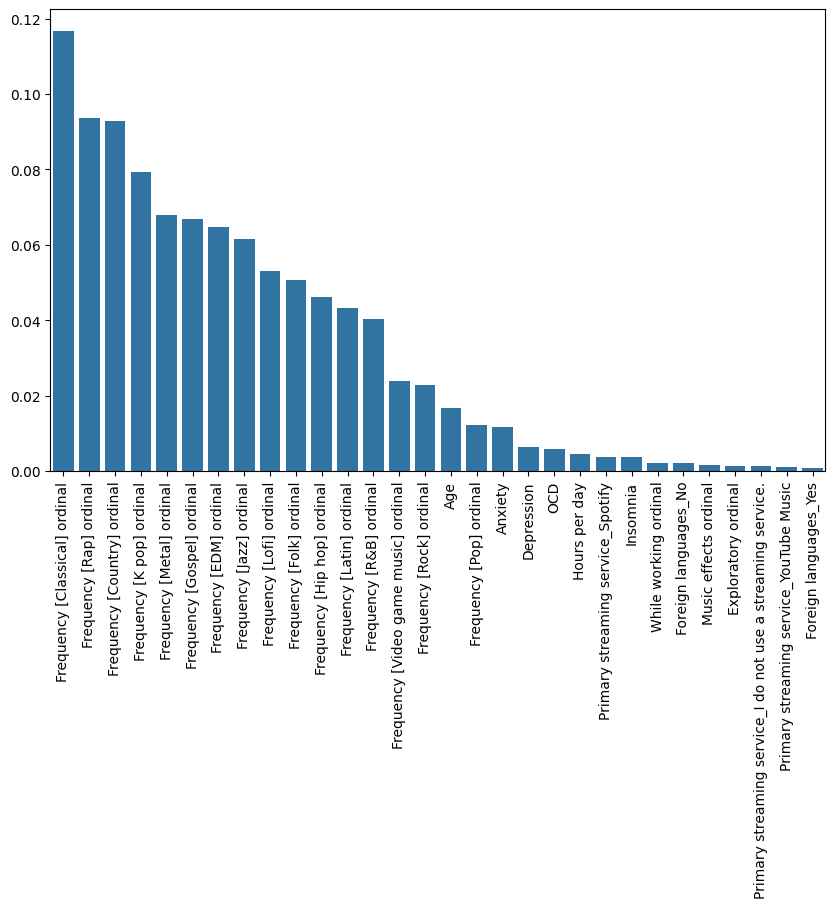

In [ ]:
feature_names = X_train2.columns.tolist()

plt.figure(figsize=(10, 6))

feat_imps = zip(feature_names, best_tree.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key = lambda x: x[1], reverse = True)))
ax = sns.barplot(x = list(feats), y = list(imps))
ax.tick_params(axis="x", rotation = 90)